<a href="https://colab.research.google.com/github/Luispsps/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Detection!
With this project I hope to be able to create a Machine learning model capable of detecting different tumors throuhg MRI Scan of our brain! This will not only be a great practice to using tensorflow but as well be able to have a contirbution to developing models capable of doing such work!

This is the data I used to complete this project: https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans?select=glioma

In [ ]:
!unzip archive.zip

# Organizing and Curating Dataset

In [2]:
import os

def imageCounter(folder_path):

  image_extensions = {".png", ".jpg", ".jpeg", ".gif", ".bmp"}

  image_count = sum(1 for file in os.listdir(folder_path) if any(file.lower().endswith(ext) for ext in image_extensions))

  return image_count

print(imageCounter("/content/glioma"))
print(imageCounter("/content/healthy"))
print(imageCounter("/content/meningioma"))
print(imageCounter("/content/pituitary"))


1621
2000
1645
1757


In [3]:
parent_directory = "train"
child_directories = ["healthy", "glioma", "meningioma", "pituitary"]

for child in child_directories:
    child_path = os.path.join(parent_directory, child)
    os.makedirs(child_path, exist_ok=True)

In [4]:
parent_directory = "test"
child_directories = ["healthy", "glioma", "meningioma", "pituitary"]

for child in child_directories:
    child_path = os.path.join(parent_directory, child)
    os.makedirs(child_path, exist_ok=True)

# Dividing images with testing and training sets!

In [5]:
1621/2

810.5

In [6]:
import shutil

source_folder = "/content/glioma"
destination_folder = "/content/test/glioma"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files) - 810

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

In [7]:
source_folder = "/content/glioma"
destination_folder = "/content/train/glioma"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files)

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

In [8]:
2000/2

1000.0

In [9]:
source_folder = "/content/healthy"
destination_folder = "/content/test/healthy"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files) - 1000

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

In [10]:
source_folder = "/content/healthy"
destination_folder = "/content/train/healthy"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files)

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

In [11]:
1645/2

822.5

In [12]:
from PIL import Image

with Image.open("/content/test/glioma/0000.jpg") as img:
    width, height = img.size

print("Width:", width)
print("Height:", height)

Width: 512
Height: 512


In [13]:
source_folder = "/content/meningioma"
destination_folder = "/content/test/meningioma"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files) - 822

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

In [14]:
source_folder = "/content/meningioma"
destination_folder = "/content/train/meningioma"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files)

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

In [15]:
1757/2

878.5

In [16]:
source_folder = "/content/pituitary"
destination_folder = "/content/test/pituitary"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files) - 878

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

In [17]:
source_folder = "/content/pituitary"
destination_folder = "/content/train/pituitary"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files)

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

# Splitting and Curating Data

In [35]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

ds_train = image_dataset_from_directory(
    '/content/train',
    labels='inferred',
    label_mode='int',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=32,
    shuffle=True,

)

ds_test = image_dataset_from_directory(
    '/content/test',
    labels='inferred',
    label_mode='int',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=32,
    shuffle = True,

)

class_train_names = ds_train.class_names
class_test_names = ds_test.class_names
print(class_train_names)
print(class_test_names)

Found 3510 files belonging to 4 classes.
Found 3513 files belonging to 4 classes.
['glioma', 'healthy', 'meningioma', 'pituitary']
['glioma', 'healthy', 'meningioma', 'pituitary']


In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
ds_test = ds_test.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
normalization_layer = layers.Rescaling(1./255)

In [43]:
normalized_ds = ds_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9843138


In [40]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


# Developing and Validating Model

In [46]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')
  ])

In [47]:
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │       2,986,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,991,236 (11.41 MB)

 Trainable params: 2,991,236 (11.41 MB)

 Non-trainable params: 0 (0.00 B)

None


In [48]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
history = model.fit(ds_train, validation_data=ds_test, epochs=10)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.4651 - loss: 121.4501 - val_accuracy: 0.7506 - val_loss: 0.6034
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.8402 - loss: 0.3743 - val_accuracy: 0.8668 - val_loss: 0.4247
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9544 - loss: 0.1314 - val_accuracy: 0.8742 - val_loss: 0.5828
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.9788 - loss: 0.0887 - val_accuracy: 0.8967 - val_loss: 0.4830
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9888 - loss: 0.0473 - val_accuracy: 0.8964 - val_loss: 0.4911
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.9964 - loss: 0.0205 - val_accuracy: 0.8972 - val_loss: 0.5457
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9980 - loss: 0.0119 - val_accuracy: 0.9007 - val_loss: 0.5991
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.9998 - loss: 0.0041 - val_ac

# Results

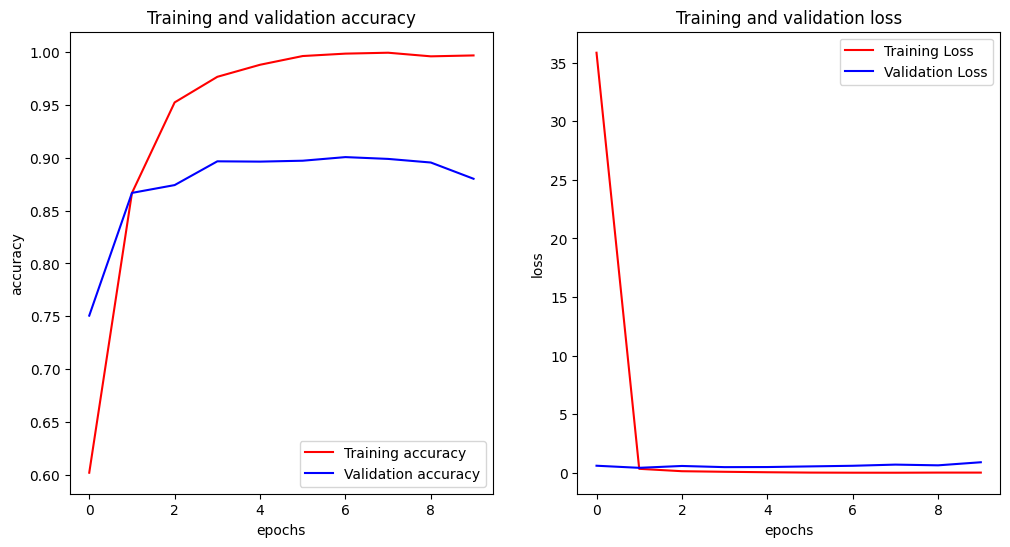

In [50]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'r', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'r', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)